In [ ]:
# 출처: https://jimmy-ai.tistory.com/m/19

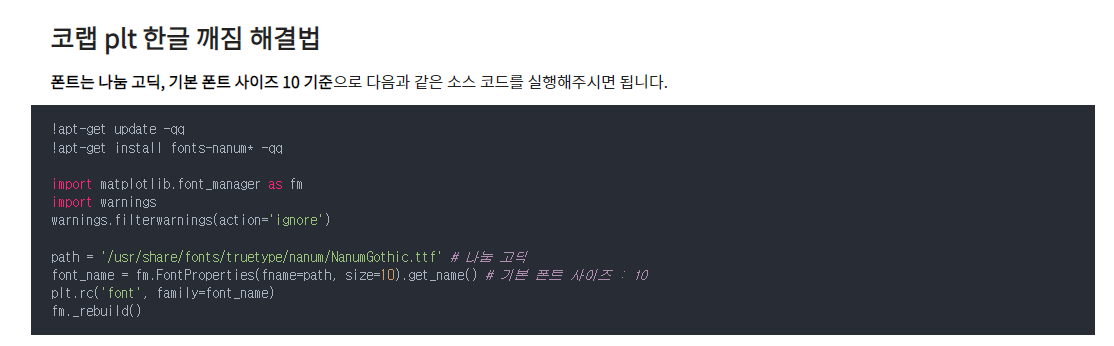

# 1. 제목 워드 클라우드

In [ ]:
##konlpy, Mecab 형태소 분석기 설치 스크립트 실행
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash


In [2]:
#경로 변경
%cd /content/drive/MyDrive/_프로젝트_교육생

/content/drive/MyDrive/_프로젝트_교육생


In [3]:
!pwd

/content/drive/MyDrive/_프로젝트_교육생


In [4]:
#코랩에서 plt 한글 깨짐 해결 아래 2개의 코드를 실행하고 런타임 다시직해야 함
!apt-get update -qq
!apt-get install fonts-nanum* -qq
# 위의 모듈 설치 후 메뉴[런타임-런타임 다시 시작]을 해야 함

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = 'NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()

In [6]:
from konlpy.tag import Mecab
import pandas as pd
#워드 클라우드
from wordcloud import WordCloud

mecab = Mecab()

df=pd.read_csv('./최종_전세사기_all_.csv')
text=' '.join(df['title']) # 제목만 추출
nouns=mecab.nouns(text) # 제목에서 명사 추출
re1=' '.join(nouns)


In [7]:
re1

'서울 갭 투자 부동산 경매 갭 투자 갭 투자 질문 김포 빌라 갭 투자 개인 회생 개시 결정 후 갭 투자 갭 투자 담보 대출 공문서 위조 갭 투자 뜻 갭 투자 부동산 전세 갭 투자 질문 갭 투자 질문 갭 투자 명 대신 거 질문 갭 투자 소개 수 집 주인 거주 갭 투자 진행 방법 재개발 갭 투자 주택 주택 담보 대출 갭 투자 회수 관련 문 갭 투자 개인 회생 갭 투자 이거 갭 투자 전세 대출 가능 조정 지역 갭 투자 가능 여부 부동산 갭 투자 부동산 갭 투자 경매 공매 익산 서울 갭 투자 원리 이해 세 작년 집 갭 투자 부동산 갭 투자 뜻 전세 갭 투자 질문 갭 투자 뭐 아파트 갭 투자 질문 전세 매매 전세 갭 투자 문 아파트 갭 투자 문의 조정 지역 분양 조정 지역 아파트 갭 투자 갭 투자 이해 부분 갭 투자 위험 갭 투자 건 대 오피스텔 갭 투자 자본금 갭 투자 집 마련 가능 갭 투자 집 주인 갭 투자 매매 갭 투자 시 전세금 처리 갭 투자 관련 문 갭 투자 빌라 전세 때 주 담대 건가요 갭 투자 집 채 전세 자금 대출 갭 투자 디딤돌 대출 차이 아파트 갭 투자 중 세입자 문자 초보 갭 투자 질문 갭 투자 문 갭 투자 집 팔 때 양 소득세 계산 갭 투자 관련 질문 갭 투자 갭 투자 매물 건가요 갭 투자 이해 갭 투자 양도 소득세 문 갭 투자 경매 대출 질문 갭 투자 사기 계약 질문 전세 갭 투자 사기 전세 갭 투자 계약금 관련 의뢰 갭 투자 때 갭 투자 깡통 전세 사기 것 시어머니 갭 투자 아파트 매매 때 대인 제 갭 투자 억 원 갭 투자 질문 갭 투자 명 갭 투자 전세 사기 갭 투자 질문 규제 지역 갭 투자 관련 문의 주택 갭 투자 뜻 주택 담보 대출 활용 갭 투자 가능 갭 투자 전세 관련 질문 내공 갭 투자 건가요 억 원 갭 투자 매매 말 부동산 갭 투자 사례 이유 갭 투자 관련 본인 소유 집 갭 투자 전세금 대출 가능 갭 투자 매매 임차권 매수인 승계 문제 부동산 갭 투자 말 갭 투자 기초 질문 내공 갭 투자 후 매매 시 점 고려 갭 투자 개념 질문 전

In [8]:
# 제목에서 명사추출한 리스트 pickle로 저장하기(re1)
import pickle
with open('title_nouns.pickle', 'wb') as f:
    pickle.dump(re1, f, pickle.HIGHEST_PROTOCOL)

# load
# with open('nouns.pickle', 'rb') as f:
#     data = pickle.load(f)

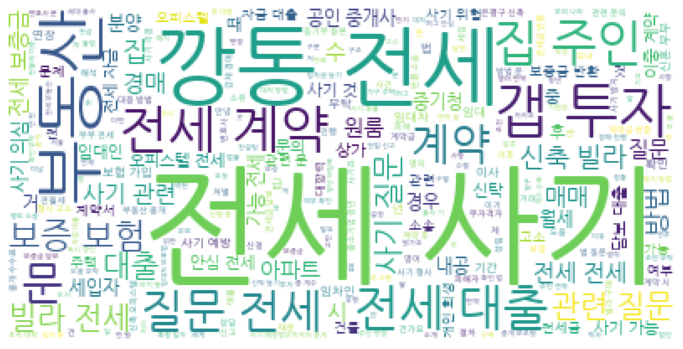

In [47]:
# stopwords 처리 전
wc = WordCloud('./NanumGothic.ttf',
               background_color = "white",
               max_words = 2000)
               #stopwords = stopwords)
wc = wc.generate(re1) # str자료만 가능, list자료는 안됨
plt.figure(figsize = (12, 12))
plt.imshow(wc) #interpolation = "bilinear")
plt.axis("off")
plt.savefig('./제목_워드클라우드_freq50/제목만 워드클라우드.png')
plt.show()

In [ ]:
#stopwords 처리 후
# stopwords=['전세','사기', '관련','사항']

# wc = WordCloud('./NanumGothic.ttf',
#                background_color = "white",
#                max_words = 2000,
#                stopwords = stopwords)
# wc = wc.generate(re1) # str자료만 가능, list자료는 안됨
# plt.figure(figsize = (12, 12))
# plt.imshow(wc) #interpolation = "bilinear")
# plt.axis("off")
# plt.savefig('./제목워드클라우드_stopword적용.jpg')
# plt.show()

# 2. 단어 집계 (상위 노출 50단어 시각화)

In [10]:
from collections import Counter

In [11]:
#stopword
re2=re1.split(' ') 
stopword=['관련','문','질문','시','사항','주','일','것','수','거']
re3=[i for i in re2 if i not in stopword]

In [12]:
top=50
cnt = Counter(re3)
top_=cnt.most_common(top)
top_

[('전세', 1574),
 ('사기', 965),
 ('깡통', 260),
 ('계약', 242),
 ('대출', 219),
 ('부동산', 177),
 ('집', 154),
 ('투자', 133),
 ('갭', 128),
 ('빌라', 128),
 ('주인', 103),
 ('방법', 95),
 ('신축', 89),
 ('가능', 86),
 ('보증', 86),
 ('보험', 86),
 ('보증금', 80),
 ('경매', 73),
 ('오피스텔', 69),
 ('반환', 64),
 ('매매', 53),
 ('소송', 47),
 ('공인', 46),
 ('신탁', 45),
 ('중개사', 44),
 ('후', 42),
 ('부탁', 42),
 ('중개', 42),
 ('문의', 41),
 ('전세금', 41),
 ('중', 41),
 ('원룸', 41),
 ('의심', 41),
 ('아파트', 40),
 ('확인', 40),
 ('주택', 39),
 ('월세', 39),
 ('경우', 37),
 ('분양', 36),
 ('내공', 36),
 ('안심', 35),
 ('여부', 34),
 ('중기청', 34),
 ('때', 33),
 ('세입자', 33),
 ('임대인', 32),
 ('법', 32),
 ('위험', 31),
 ('고소', 31),
 ('담보', 30)]

In [13]:
df_top=pd.DataFrame(top_, columns=['word','freq']).set_index('word')
df_top.head()

,freq
word,
전세,1574
사기,965
깡통,260
계약,242
대출,219


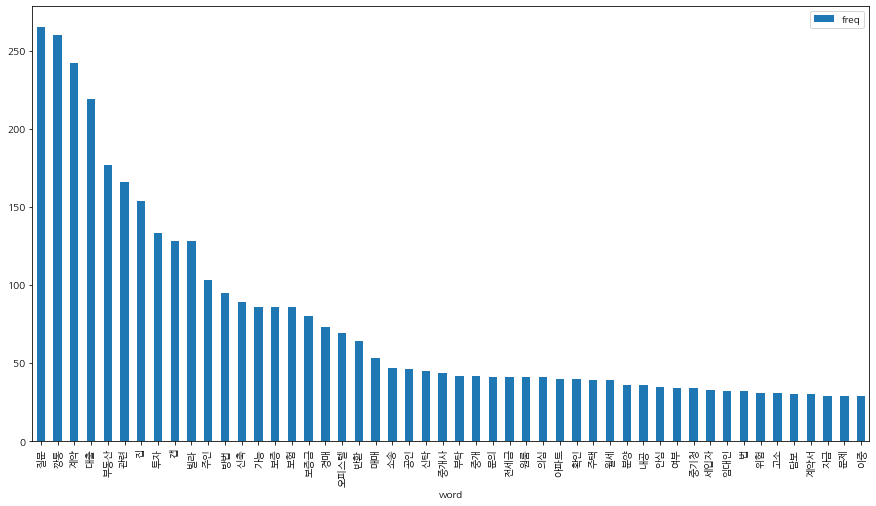

In [42]:
df_top.plot(kind='bar',figsize=(15,8))
plt.savefig('./제목_워드클라우드_freq50/제목freq50_bar_chart_전세사기단어_포함.png')
plt.show()

### 전세 ,사기 -> stopword로 설정

In [23]:
#stopword
re2=re1.split(' ') 
stopword=['전세','사기','경우','후','때','문','것','시','중','거','수']
re3=[i for i in re2 if i not in stopword]

In [24]:
top=50
cnt = Counter(re3)
top_=cnt.most_common(top)
top_

[('질문', 265),
 ('깡통', 260),
 ('계약', 242),
 ('대출', 219),
 ('부동산', 177),
 ('관련', 166),
 ('집', 154),
 ('투자', 133),
 ('갭', 128),
 ('빌라', 128),
 ('주인', 103),
 ('방법', 95),
 ('신축', 89),
 ('가능', 86),
 ('보증', 86),
 ('보험', 86),
 ('보증금', 80),
 ('경매', 73),
 ('오피스텔', 69),
 ('반환', 64),
 ('매매', 53),
 ('소송', 47),
 ('공인', 46),
 ('신탁', 45),
 ('중개사', 44),
 ('부탁', 42),
 ('중개', 42),
 ('문의', 41),
 ('전세금', 41),
 ('원룸', 41),
 ('의심', 41),
 ('아파트', 40),
 ('확인', 40),
 ('주택', 39),
 ('월세', 39),
 ('분양', 36),
 ('내공', 36),
 ('안심', 35),
 ('여부', 34),
 ('중기청', 34),
 ('세입자', 33),
 ('임대인', 32),
 ('법', 32),
 ('위험', 31),
 ('고소', 31),
 ('담보', 30),
 ('계약서', 30),
 ('자금', 29),
 ('문제', 29),
 ('이중', 29)]

In [25]:
df_top=pd.DataFrame(top_, columns=['word','freq']).set_index('word')
df_top.head()

,freq
word,
질문,265
깡통,260
계약,242
대출,219
부동산,177


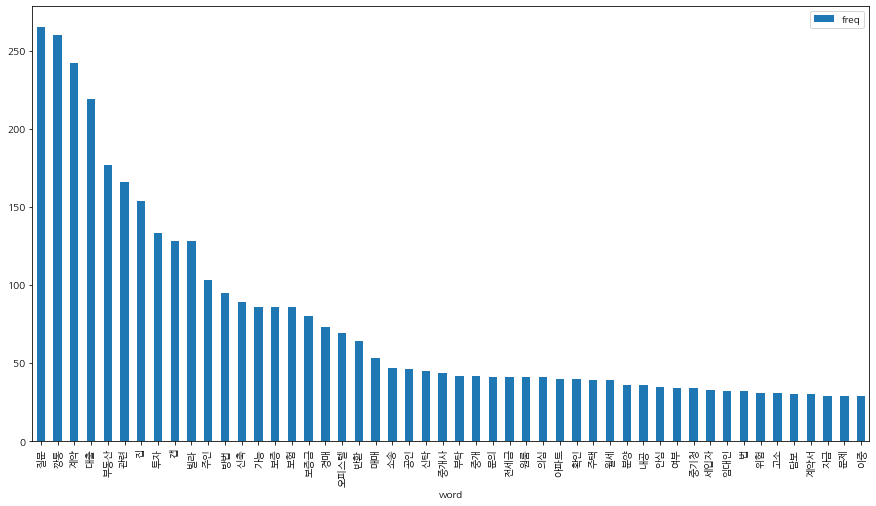

In [43]:
df_top.plot(kind='bar',figsize=(15,8))
plt.savefig('./제목_워드클라우드_freq50/제목freq50_bar_chart_전세사기단어_제외.png')
plt.show()